In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tkinter as tk

from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg,NavigationToolbar2Tk

In [3]:
grocery_data=pd.read_csv("Grocery_Inventory_and_Sales_Dataset.csv")
grocery_data=grocery_data.head(10)
grocery_data

,Product_ID,Product_Name,Catagory,Supplier_ID,Supplier_Name,Stock_Quantity,Reorder_Level,Reorder_Quantity,Unit_Price,Date_Received,Last_Order_Date,Expiration_Date,Warehouse_Location,Sales_Volume,Inventory_Turnover_Rate,Status
0,29-205-1132,Sushi Rice,Grains & Pulses,38-037-1699,Jaxnation,22,72,70,$4.50,8/16/2024,6/29/2024,9/19/2024,48 Del Sol Trail,32,19,Discontinued
1,40-681-9981,Arabica Coffee,Beverages,54-470-2479,Feedmix,45,77,2,$20.00,11/1/2024,5/29/2024,5/8/2024,36 3rd Place,85,1,Discontinued
2,06-955-3428,Black Rice,Grains & Pulses,54-031-2945,Vinder,30,38,83,$6.00,8/3/2024,6/10/2024,9/22/2024,3296 Walton Court,31,34,Backordered
3,71-594-6552,Long Grain Rice,Grains & Pulses,63-492-7603,Brightbean,12,59,62,$1.50,12/8/2024,2/19/2025,4/17/2024,3 Westerfield Crossing,95,99,Active
4,57-437-1828,Plum,Fruits & Vegetables,54-226-4308,Topicstorm,37,30,74,$4.00,7/3/2024,10/11/2024,10/5/2024,15068 Scoville Court,62,25,Backordered
5,21-120-6238,All-Purpose Flour,Grains & Pulses,86-292-4587,Dabjam,55,33,14,$1.75,12/3/2024,5/26/2024,9/5/2024,050 Mcbride Avenue,34,62,Discontinued
6,71-516-1996,Corn Oil,Oils & Fats,04-391-7610,Tagfeed,96,52,16,$2.50,3/18/2024,5/7/2024,6/20/2024,12 Truax Court,67,13,Active
7,39-629-5554,Egg (Goose),Dairy,67-679-4930,Muxo,44,90,17,$2.50,2/3/2025,4/9/2024,2/5/2025,267 International Plaza,21,91,Discontinued
8,66-268-8345,Greek Yogurt,Dairy,32-182-1895,Thoughtstorm,91,84,11,$3.00,12/4/2024,6/2/2024,1/8/2025,550 Clemons Plaza,56,90,Active
9,46-452-9419,Egg (Duck),Dairy,67-137-4215,Wordify,43,10,15,$1.00,11/18/2024,11/14/2024,7/8/2024,55782 Welch Hill,27,69,Active


In [4]:
grocery_data['Date_Received']=pd.to_datetime(
    grocery_data['Date_Received'],format='%m/%d/%Y')


grocery_data['Date_Received']=grocery_data['Date_Received'].dt.strftime('%B')
grocery_data['Date_Received']
    

0      August
1    November
2      August
3    December
4        July
5    December
6       March
7    February
8    December
9    November
Name: Date_Received, dtype: object

In [5]:
grouped_data = grocery_data.groupby('Date_Received')['Stock_Quantity'].sum()
grouped_data1 = grocery_data.groupby('Date_Received')['Reorder_Level'].sum()
grouped_data2 = grocery_data.groupby('Date_Received')['Reorder_Quantity'].sum()

<Figure size 640x480 with 0 Axes>

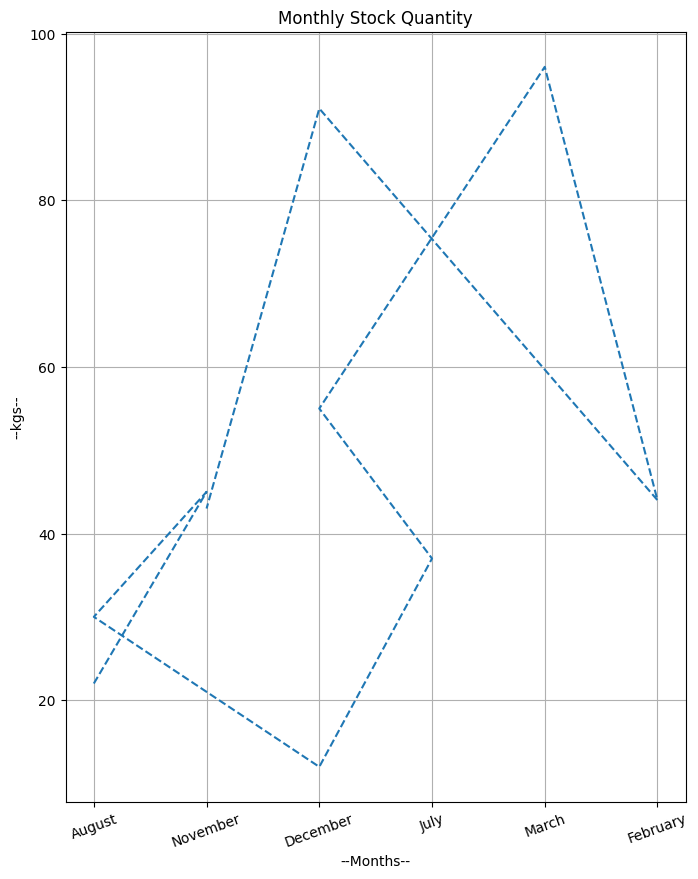

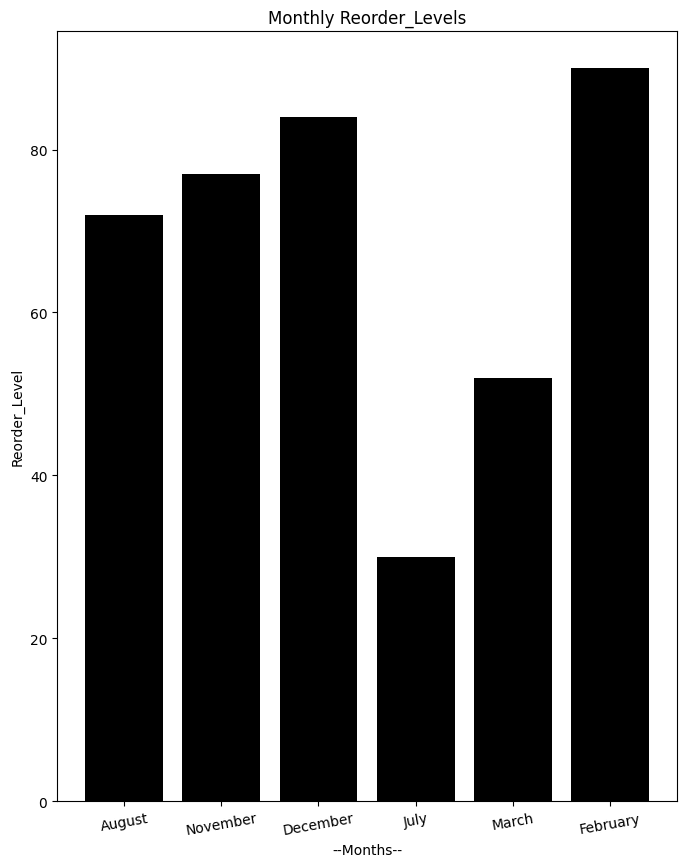

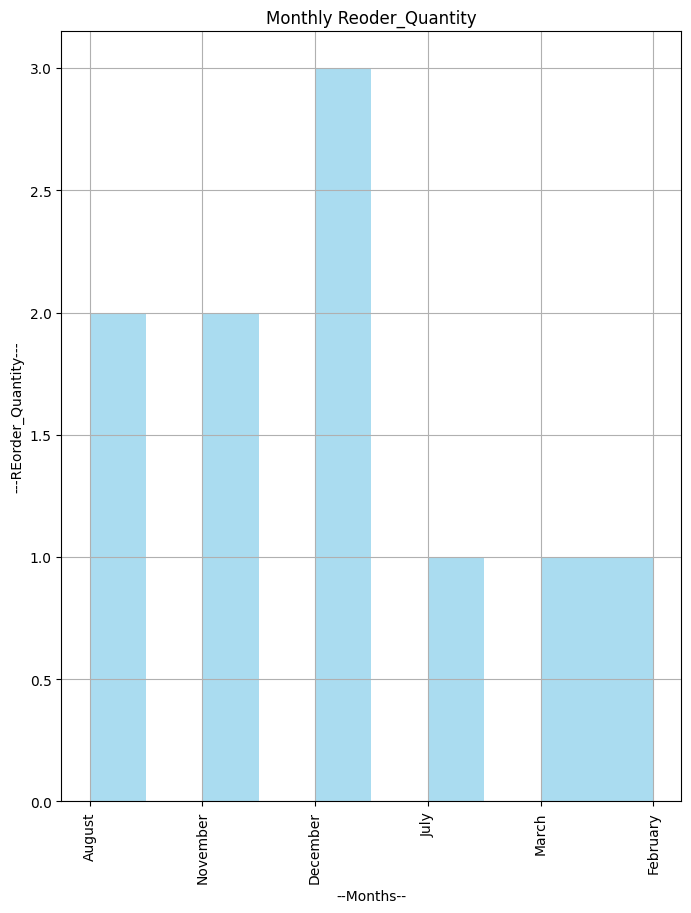

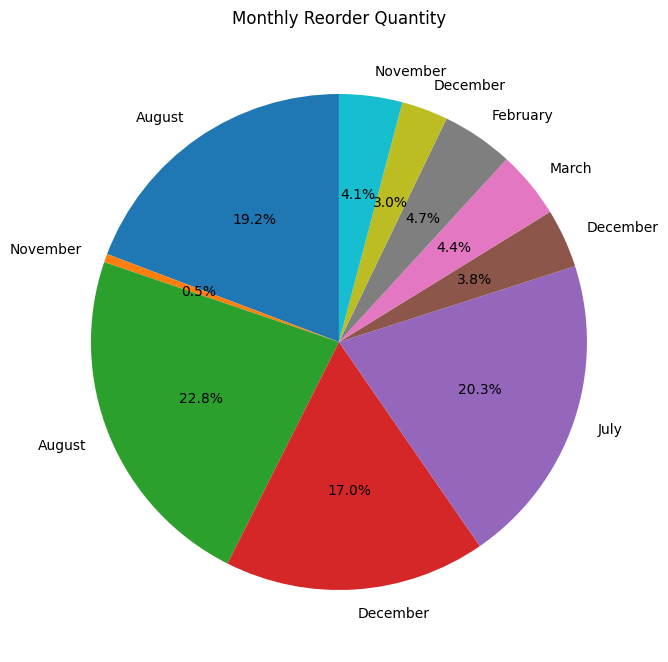

In [6]:
plt.subplots_adjust(hspace=0.5)
fig1, axs1 = plt.subplots( figsize=(8, 10))
axs1.plot(grocery_data['Date_Received'],grocery_data['Stock_Quantity'],linestyle='--',markerfacecolor='r')
axs1.set(title='Monthly Stock Quantity',ylabel='--kgs--',xlabel='--Months--')
axs1.grid(True)
axs1.tick_params(axis='x', rotation=20)
fig2, axs2 = plt.subplots( figsize=(8, 10))
axs2.bar(grocery_data['Date_Received'],grocery_data['Reorder_Level'],color='black')
axs2.set(title="Monthly Reorder_Levels",ylabel='Reorder_Level',xlabel='--Months--')
axs2.tick_params(axis='x', rotation=10)
fig3, axs3 = plt.subplots( figsize=(8, 10))
axs3.hist(grocery_data['Date_Received'],bins=10,color='skyblue',alpha=0.7)
axs3.set(title='Monthly Reoder_Quantity',ylabel='---REorder_Quantity---',xlabel='--Months--')
axs3.tick_params(axis='x', rotation=90)
axs3.grid(True)
fig4, axs4 = plt.subplots( figsize=(8, 10))
axs4.pie(grocery_data['Reorder_Quantity'], labels=grocery_data['Date_Received'], autopct='%1.1f%%', startangle=90)
axs4.set(title='Monthly Reorder Quantity')
plt.show()

In [ ]:
#creating the window(the main window)
root=tk.Tk()
root.title('MOnthly Dashboard')
root.state('zoomed')

#creating an upper frame

upper_frame=tk.Frame(root)
upper_frame.pack(fill='both',expand=True)

#adding the first plot in the main frame
canvas1=FigureCanvasTkAgg(fig1,upper_frame)
canvas1.draw()
canvas1.get_tk_widget().pack(side='left',fill='both',expand=True)

canvas2=FigureCanvasTkAgg(fig2,upper_frame)
canvas2.draw()
canvas2.get_tk_widget().pack(side='right',fill='both',expand=True)



canvas3=FigureCanvasTkAgg(fig3,upper_frame)
canvas3.draw()
canvas3.get_tk_widget().pack(side='bottom',fill='both',expand=True)



canvas4=FigureCanvasTkAgg(fig4,upper_frame)
canvas4.draw()
canvas4.get_tk_widget().pack(side='top',fill='both',expand=True)




root.mainloop()

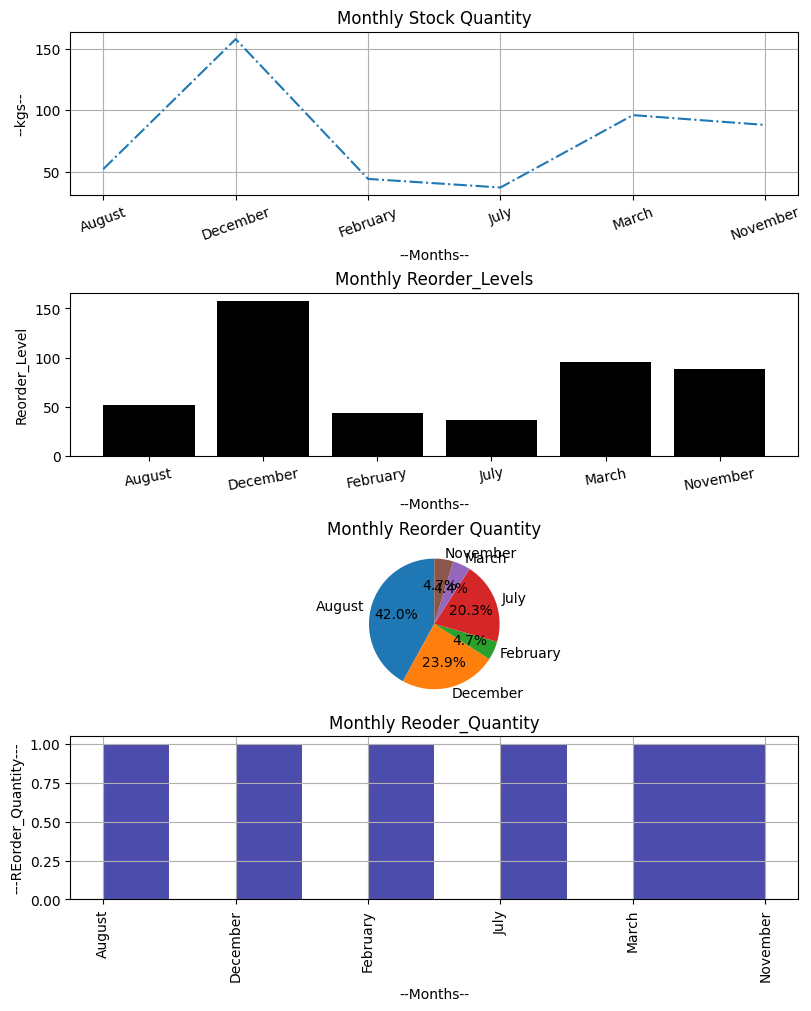

In [75]:
fig, axs = plt.subplots(4, 1, figsize=(8, 10),constrained_layout=True)
axs[0].plot(grouped_data.index,grouped_data.values,linestyle='-.',markerfacecolor='r')
axs[0].set(title='Monthly Stock Quantity',ylabel='--kgs--',xlabel='--Months--')
axs[0].grid(True)
axs[0].tick_params(axis='x', rotation=20)
axs[1].bar(grouped_data.index,grouped_data.values,color='black')
axs[1].set(title="Monthly Reorder_Levels",ylabel='Reorder_Level',xlabel='--Months--')
axs[1].tick_params(axis='x', rotation=10)
axs[2].pie(grouped_data2.values, labels=grouped_data2.index, autopct='%1.1f%%', startangle=90)
axs[2].set(title='Monthly Reorder Quantity')
axs[3].hist(grouped_data.index,bins=10,color='darkblue',alpha=0.7)
axs[3].set(title='Monthly Reoder_Quantity',ylabel='---REorder_Quantity---',xlabel='--Months--')
axs[3].tick_params(axis='x', rotation=90)
axs[3].grid(True)
plt.show()